# Automated Variable Selection and Predictive Models
## Gasoline Consumption Case

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import sys
sys.path.append('/anaconda/lib/python2.7/site-packages')
import seaborn as sns
sns.set_style("darkgrid")
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn as sk
from sklearn import feature_selection

In [64]:
gasoline = pd.read_csv('chatterjee-hadi-gasoline.csv')
len(gasoline)

30

In [65]:
gasoline.head()

,mpg,displacement,horsepower,torque,compression_ratio,rear_axle_ratio,carburetor_barrels,transmission_speeds,overall_length,width,weight,transmission_type
0,18.9,350.0,165,260,8.00,2.56,4,3,200.3,69.9,3910,1
1,17.0,350.0,170,275,8.50,2.56,4,3,199.6,72.9,3860,1
2,20.0,250.0,105,185,8.25,2.73,1,3,196.7,72.2,3510,1
3,18.3,351.0,143,255,8.00,3.00,2,3,199.9,74.0,3890,1
4,20.1,225.0,95,170,8.40,2.76,1,3,194.1,71.8,3365,0


In [66]:
pd.isnull(gasoline).sum()

mpg                    0
displacement           0
horsepower             0
torque                 0
compression_ratio      0
rear_axle_ratio        0
carburetor_barrels     0
transmission_speeds    0
overall_length         0
width                  0
weight                 0
transmission_type      0
dtype: int64

Variable | Description | Type of Variable
---| ---| ---|
mpg | miles/gallon | continuous
displacement | cubic inches | continuous
horsepower | feet/pound | continuous
torque | feet/pound | continuous
compression ratio | ratio of the maximum to minimum volume in the cylinder of an internal combustion engine| continuous
rear axle ratio | ratio of the number of gear teeth on the ring gear of the rear axle and the pinion gear on the driveshaft| continuous
carburetor barrels | number of carburetor barrels | discrete
transmission speeds | number of transmission speeds | discrete
overall length | inches | continuous
width | inches | continuous
weight | pounds | continuous
transmission type | 1 = automatic, 0 = manual | nominal

## EDA

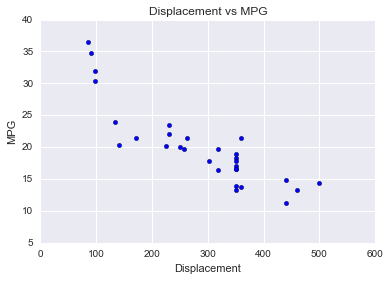

In [67]:
plt.scatter(x = "displacement", y = "mpg", data = gasoline)
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.title('Displacement vs MPG')

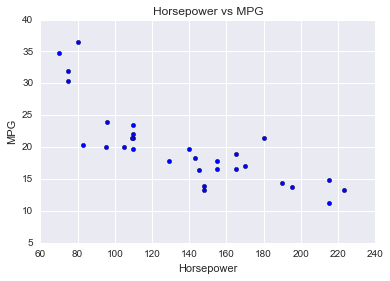

In [26]:
plt.scatter(x = "horsepower", y = "mpg", data = gasoline)
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Horsepower vs MPG')

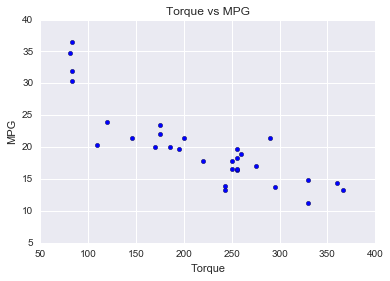

In [27]:
plt.scatter(x = "torque", y = "mpg", data = gasoline)
plt.xlabel('Torque')
plt.ylabel('MPG')
plt.title('Torque vs MPG')

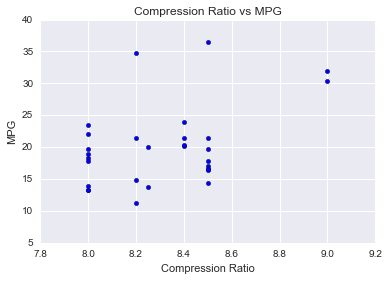

In [28]:
plt.scatter(x = "compression_ratio", y = "mpg", data = gasoline)
plt.xlabel('Compression Ratio')
plt.ylabel('MPG')
plt.title('Compression Ratio vs MPG')

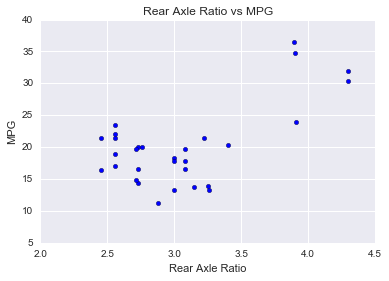

In [29]:
plt.scatter(x = "rear_axle_ratio", y = "mpg", data = gasoline)
plt.xlabel('Rear Axle Ratio')
plt.ylabel('MPG')
plt.title('Rear Axle Ratio vs MPG')

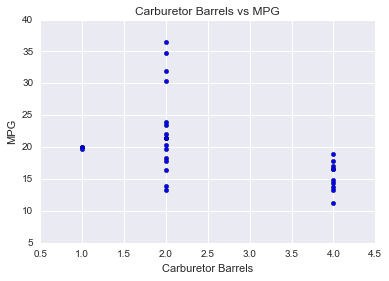

In [30]:
plt.scatter(x = "carburetor_barrels", y = "mpg", data = gasoline)
plt.xlabel('Carburetor Barrels')
plt.ylabel('MPG')
plt.title('Carburetor Barrels vs MPG')

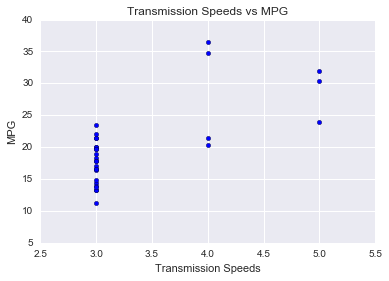

In [31]:
plt.scatter(x = "transmission_speeds", y = "mpg", data = gasoline)
plt.xlabel('Transmission Speeds')
plt.ylabel('MPG')
plt.title('Transmission Speeds vs MPG')

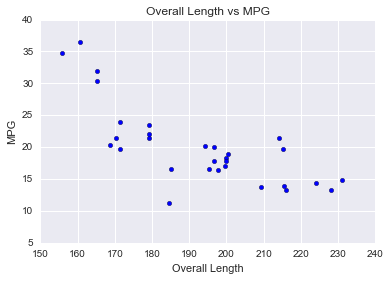

In [32]:
plt.scatter(x = "overall_length", y = "mpg", data = gasoline)
plt.xlabel('Overall Length')
plt.ylabel('MPG')
plt.title('Overall Length vs MPG')

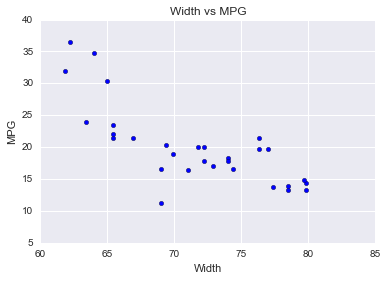

In [33]:
plt.scatter(x = "width", y = "mpg", data = gasoline)
plt.xlabel('Width')
plt.ylabel('MPG')
plt.title('Width vs MPG')

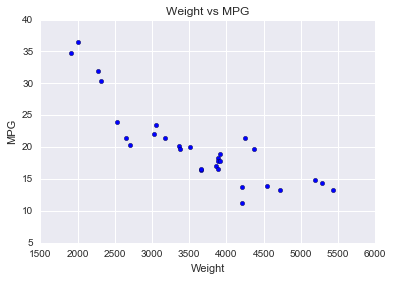

In [34]:
plt.scatter(x = "weight", y = "mpg", data = gasoline)
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Weight vs MPG')

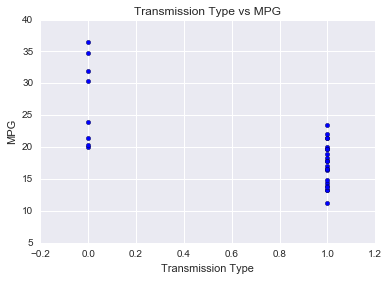

In [35]:
plt.scatter(x = "transmission_type", y = "mpg", data = gasoline)
plt.xlabel('Transmission Type')
plt.ylabel('MPG')
plt.title('Transmission Type vs MPG')

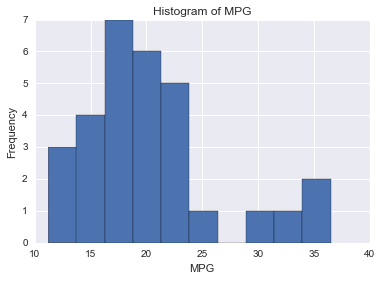

In [36]:
plt.hist(gasoline["mpg"])
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.title('Histogram of MPG')

## Try a Box Cox transformation to improve normality of response variable

In [37]:
from scipy import stats
boxcox = gasoline.copy()
boxcox['ytrans'] = stats.boxcox(gasoline.mpg)[0]

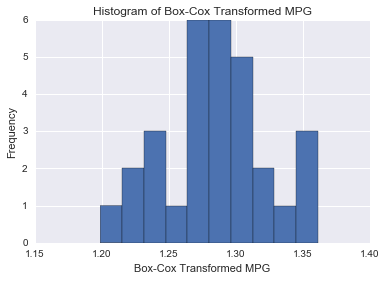

In [59]:
plt.hist(boxcox.ytrans)
plt.xlabel('Box-Cox Transformed MPG')
plt.ylabel('Frequency')
plt.title('Histogram of Box-Cox Transformed MPG')

## Try a Log transformation to improve normality of response variable

In [39]:
#do a log transformation on mpg
log_columns = ['mpg']
log_df = gasoline.copy()
log_df[log_columns] = log_df[log_columns].apply(np.log10)

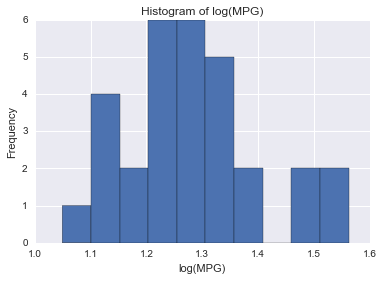

In [58]:
plt.hist(log_df.mpg)
plt.xlabel('log(MPG)')
plt.ylabel('Frequency')
plt.title('Histogram of log(MPG)')

## See which one has a more normal distribution in a simple linear regression

In [41]:
X = gasoline['weight']
y = gasoline['mpg']

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='y ~ X', data=gasoline).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     74.52
Date:                Fri, 21 Jul 2017   Prob (F-statistic):           2.23e-09
Time:                        14:52:04   Log-Likelihood:                -77.631
No. Observations:                  30   AIC:                             159.3
Df Residuals:                      28   BIC:                             162.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     40.6176      2.460     16.513      0.000        35.579    45.656
X             -0.0057      0.001     -8.632      0.000        -0.007    -0.004
==============================================================================
Omnibus:                        1.774   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.412   Jarque-Bera (JB):                1.554
Skew:                           0.433   Prob(JB):                        0.460
Kurtosis:                       2.297   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
X = boxcox['weight']
y = boxcox['ytrans']

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='y ~ X', data=gasoline).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     76.98
Date:                Fri, 21 Jul 2017   Prob (F-statistic):           1.59e-09
Time:                        14:52:04   Log-Likelihood:                 75.046
No. Observations:                  30   AIC:                            -146.1
Df Residuals:                      28   BIC:                            -143.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.4143      0.015     93.299      0.000         1.383     1.445
X          -3.554e-05   4.05e-06     -8.774      0.000     -4.38e-05 -2.72e-05
==============================================================================
Omnibus:                        9.762   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.892
Skew:                          -0.853   Prob(JB):                      0.00711
Kurtosis:                       5.237   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
X = log_df['weight']
y = log_df['mpg']

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='y ~ X', data=log_df).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     84.08
Date:                Fri, 21 Jul 2017   Prob (F-statistic):           6.29e-10
Time:                        14:52:04   Log-Likelihood:                 41.100
No. Observations:                  30   AIC:                            -78.20
Df Residuals:                      28   BIC:                            -75.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.7013      0.047     36.199      0.000         1.605     1.798
X             -0.0001   1.26e-05     -9.170      0.000        -0.000 -8.94e-05
==============================================================================
Omnibus:                        1.001   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.606   Jarque-Bera (JB):                0.378
Skew:                          -0.261   Prob(JB):                        0.828
Kurtosis:                       3.172   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

{'boxes': [<matplotlib.lines.Line2D at 0x121d2eb50>],
 'caps': [<matplotlib.lines.Line2D at 0x121d3c9d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x121d48cd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x121d48690>],
 'whiskers': [<matplotlib.lines.Line2D at 0x121d2ec90>,
  <matplotlib.lines.Line2D at 0x121d3c390>]}

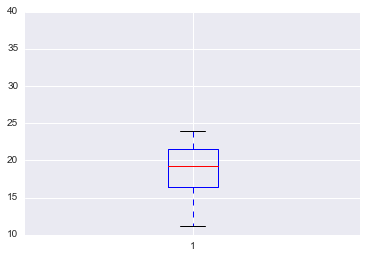

In [44]:
plt.boxplot(gasoline.mpg)

{'boxes': [<matplotlib.lines.Line2D at 0x121e81950>],
 'caps': [<matplotlib.lines.Line2D at 0x121e907d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x121e9bad0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x121e9b490>],
 'whiskers': [<matplotlib.lines.Line2D at 0x121e81a90>,
  <matplotlib.lines.Line2D at 0x121e90190>]}

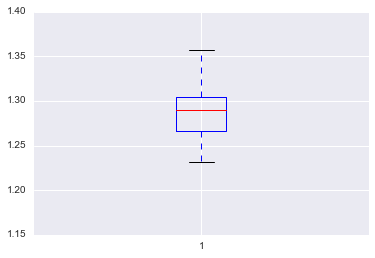

In [45]:
plt.boxplot(boxcox.ytrans)

{'boxes': [<matplotlib.lines.Line2D at 0x1228107d0>],
 'caps': [<matplotlib.lines.Line2D at 0x122820650>,
 'fliers': [<matplotlib.lines.Line2D at 0x12282b950>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12282b310>],
 'whiskers': [<matplotlib.lines.Line2D at 0x122810910>,
  <matplotlib.lines.Line2D at 0x122810fd0>]}

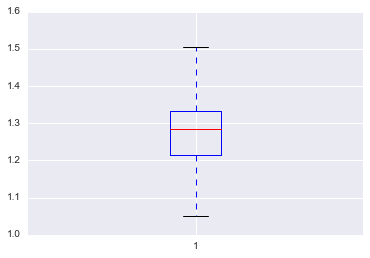

In [46]:
plt.boxplot(log_df.mpg)

## Multiple Regression Model - Full Model of log(mpg)

In [47]:
list(log_df.columns.values)

['mpg',
 'displacement',
 'horsepower',
 'torque',
 'compression_ratio',
 'rear_axle_ratio',
 'carburetor_barrels',
 'transmission_speeds',
 'overall_length',
 'width',
 'weight',
 'transmission_type']

In [48]:
X = log_df[['displacement', 'horsepower', 'torque', 'compression_ratio', 'rear_axle_ratio', 'carburetor_barrels', 'transmission_speeds', 'overall_length', 'width', 'weight', 'transmission_type']]
y = log_df['mpg']

## fit a OLS model with intercept
X = sm.add_constant(X)
lm1 = smf.OLS(y, X).fit()

lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     9.226
Date:                Fri, 21 Jul 2017   Prob (F-statistic):           2.53e-05
Time:                        14:52:06   Log-Likelihood:                 48.686
No. Observations:                  30   AIC:                            -73.37
Df Residuals:                      18   BIC:                            -56.56
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                   1.1203      0.583      1.922      0.071        -0.104     2.345
displacement           -0.0014      0.001     -1.217      0.239        -0.004     0.001
horsepower             -0.0020      0.002     -1.185      0.251        -0.006     0.002
torque                  0.0022      0.002      1.274      0.219        -0.001     0.006
compression_ratio       0.0150      0.059      0.254      0.803        -0.109     0.139
rear_axle_ratio         0.0447      0.060      0.741      0.468        -0.082     0.171
carburetor_barrels      0.0139      0.025      0.564      0.580        -0.038     0.066
transmission_speeds    -0.0085      0.059     -0.143      0.888        -0.133     0.116
overall_length          0.0041      0.002      1.642      0.118        -0.001     0.009
width                  -0.0036      0.006     -0.576      0.572        -0.017     0.009
weight                 -0.0001      0.000     -1.161      0.261        -0.000     0.000
transmission_type       0.0331      0.058      0.573      0.574        -0.088     0.154
==============================================================================
Omnibus:                        0.064   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.969   Jarque-Bera (JB):                0.115
Skew:                           0.082   Prob(JB):                        0.944
Kurtosis:                       2.744   Cond. No.                     1.96e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

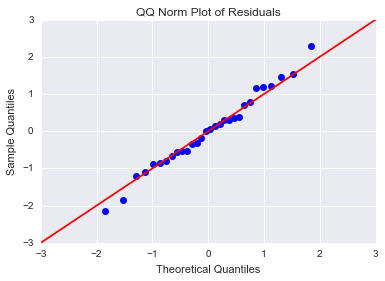

In [49]:
#qqnorm plot
fig = sm.qqplot(lm1.resid, fit=True, line='45')
plt.show
plt.title('QQ Norm Plot of Residuals')

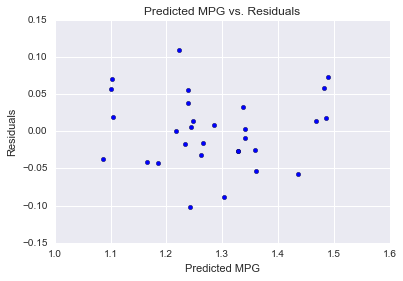

In [62]:
#fitted values vs residuals
plt.scatter(lm1.fittedvalues, lm1.resid)
plt.xlabel('Predicted MPG')
plt.ylabel('Residuals')
plt.title('Predicted MPG vs. Residuals')

## Multiple Linear Regression - Subset Model of log(mpg)

In [51]:
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """


    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

# source: http://trevor-smith.github.io/stepwise-post/

In [52]:
lm2 = forward_selected(log_df, 'mpg')
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     35.98
Date:                Fri, 21 Jul 2017   Prob (F-statistic):           2.10e-09
Time:                        14:52:08   Log-Likelihood:                 44.884
No. Observations:                  30   AIC:                            -81.77
Df Residuals:                      26   BIC:                            -76.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.9951      0.370      2.686      0.012         0.234     1.757
displacement         -0.0010      0.000     -6.374      0.000        -0.001    -0.001
compression_ratio     0.0667      0.043      1.534      0.137        -0.023     0.156
transmission_type     0.0467      0.044      1.053      0.302        -0.044     0.138
==============================================================================
Omnibus:                        0.709   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.701   Jarque-Bera (JB):                0.746
Skew:                           0.175   Prob(JB):                        0.689
Kurtosis:                       2.311   Cond. No.                     1.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

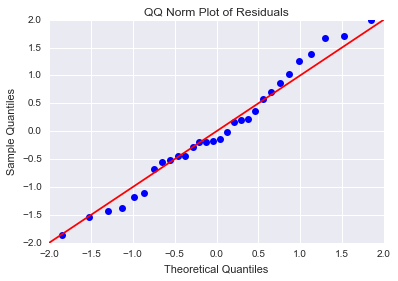

In [53]:
#qqnorm plot
fig = sm.qqplot(lm2.resid, fit=True, line='45')
plt.show
plt.title('QQ Norm Plot of Residuals')

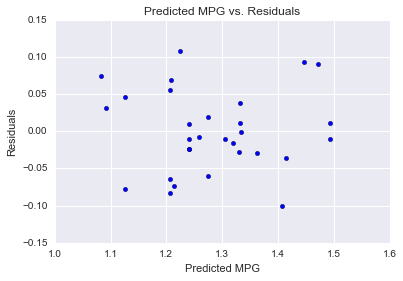

In [61]:
#fitted values vs residuals
plt.scatter(lm2.fittedvalues, lm2.resid)
plt.xlabel('Predicted MPG')
plt.ylabel('Residuals')
plt.title('Predicted MPG vs. Residuals')

## Compare MAE

In [55]:
import sklearn.metrics as skm
print skm.mean_absolute_error(log_df["mpg"], lm1.fittedvalues, sample_weight=None, multioutput='uniform_average')
print skm.mean_absolute_error(log_df["mpg"], lm2.fittedvalues, sample_weight=None, multioutput='uniform_average')

0.0383080225416
0.0438075075768
